#Swipes data cleaning

In [5]:
import pandas as pd
# url2="https://raw.githubusercontent.com/kushalpoddar/idyll-dummy-dataset/main/swipes.csv"
# swipes=pd.read_csv(url2,low_memory=False)
swipes=pd.read_csv('./swipes.csv',low_memory=False)   

Devising a scoring function. Profile score is a user’s profile score
having parameters like verified, if 100% completion, number of users
liked him/her, number of matches received, paid subscription or a free
profile, verified user or not, number of likes done vs received, dislike
by likes ratio performed and received,

In [6]:
swipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66622 entries, 0 to 66621
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     66622 non-null  int64 
 1   first_like_unlike_at   66622 non-null  object
 2   first_msg              169 non-null    object
 3   first_type             66622 non-null  object
 4   is_unmatch             66622 non-null  bool  
 5   like_count             66622 non-null  int64 
 6   p1                     66622 non-null  int64 
 7   p1_extend_at           102 non-null    object
 8   p2                     66622 non-null  int64 
 9   p2_extend_at           151 non-null    object
 10  second_like_unlike_at  4730 non-null   object
 11  second_msg             26 non-null     object
 12  second_type            4730 non-null   object
 13  unmatch_on             147 non-null    object
dtypes: bool(1), int64(4), object(9)
memory usage: 6.7+ MB


In [7]:
cols=['first_like_unlike_at','first_type','is_unmatch','like_count','p1','p2','second_like_unlike_at','second_type','unmatch_on']
swipes=swipes[cols]
swipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66622 entries, 0 to 66621
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   first_like_unlike_at   66622 non-null  object
 1   first_type             66622 non-null  object
 2   is_unmatch             66622 non-null  bool  
 3   like_count             66622 non-null  int64 
 4   p1                     66622 non-null  int64 
 5   p2                     66622 non-null  int64 
 6   second_like_unlike_at  4730 non-null   object
 7   second_type            4730 non-null   object
 8   unmatch_on             147 non-null    object
dtypes: bool(1), int64(3), object(5)
memory usage: 4.1+ MB


In [8]:
swipes['unmatch_on'].isna().sum()

66475

In [9]:
swipes.isna().sum()

first_like_unlike_at         0
first_type                   0
is_unmatch                   0
like_count                   0
p1                           0
p2                           0
second_like_unlike_at    61892
second_type              61892
unmatch_on               66475
dtype: int64

In [10]:
swipes.p1.value_counts()

11      663
1238    602
2       351
1098    318
831     276
       ... 
112       2
1192      2
1142      1
1188      1
643       1
Name: p1, Length: 1055, dtype: int64

In [11]:
swipes.p2.value_counts()

170     358
160     350
224     348
450     347
404     347
       ... 
243       1
28        1
27        1
942       1
1402      1
Name: p2, Length: 1042, dtype: int64

In [12]:
swipes.p1.isna().sum()

0

In [13]:
swipes = swipes.sort_values(by=['p1','first_like_unlike_at'], ascending=[True,True])
swipes.tail()

,first_like_unlike_at,first_type,is_unmatch,like_count,p1,p2,second_like_unlike_at,second_type,unmatch_on
66540,2023-03-03T17:58:43.895Z,LIKE,False,1,1404,1064,NaN,NaN,NaN
66541,2023-03-03T17:58:48.321Z,DISLIKE,False,1,1404,1098,NaN,NaN,NaN
66542,2023-03-03T17:58:53.994Z,LIKE,False,1,1404,940,NaN,NaN,NaN
66543,2023-03-03T17:58:57.018Z,LIKE,False,1,1404,1223,NaN,NaN,NaN
66544,2023-03-03T17:59:01.925Z,LIKE,False,1,1404,1178,NaN,NaN,NaN


In [14]:
swipes['p1'].value_counts()


11      663
1238    602
2       351
1098    318
831     276
       ... 
20        2
112       2
1142      1
1188      1
643       1
Name: p1, Length: 1055, dtype: int64

In [15]:
swipes['p2'].value_counts()

170     358
160     350
224     348
404     347
450     347
       ... 
989       1
996       1
1060      1
929       1
1385      1
Name: p2, Length: 1042, dtype: int64

In [16]:
swipes['is_unmatch'].value_counts()

False    66475
True       147
Name: is_unmatch, dtype: int64

In [17]:
swipes[swipes['is_unmatch']==1]

,first_like_unlike_at,first_type,is_unmatch,like_count,p1,p2,second_like_unlike_at,second_type,unmatch_on
212,2023-02-08T05:13:13.430Z,LIKE,True,2,0,35,2023-02-09T06:39:18.142Z,LIKE,2023-02-11T11:31:48.390Z
9002,2023-02-09T13:26:31.608Z,LIKE,True,2,2,468,2023-02-10T02:21:28.070Z,LIKE,2023-02-13T19:27:37.333Z
30545,2023-02-14T19:54:16.975Z,LIKE,True,2,2,1029,2023-02-15T00:36:53.312Z,LIKE,2023-02-16T17:45:39.455Z
30554,2023-02-14T19:54:36.951Z,DISLIKE,True,2,2,982,2023-02-24T15:50:59.927Z,DISLIKE,2023-02-24T15:51:06.011Z
11489,2023-02-10T06:29:50.741Z,LIKE,True,2,3,259,2023-02-10T08:52:55.902Z,LIKE,2023-02-10T09:29:00.331Z
...,...,...,...,...,...,...,...,...,...
45540,2023-02-18T17:36:26.651Z,LIKE,True,2,1252,7,2023-02-21T07:31:15.678Z,LIKE,2023-02-24T07:40:33.784Z
48233,2023-02-20T03:54:31.612Z,LIKE,True,2,1270,7,2023-02-21T07:29:20.974Z,LIKE,2023-02-23T17:06:34.654Z
54698,2023-02-22T20:41:23.734Z,LIKE,True,2,1306,1238,2023-02-24T11:41:18.643Z,LIKE,2023-03-02T07:41:35.831Z
54700,2023-02-22T20:41:35.524Z,LIKE,True,2,1306,1227,2023-02-26T08:09:45.056Z,LIKE,2023-03-02T07:41:11.864Z


In [18]:
swipes['unmatch_on'] = pd.to_datetime(swipes['unmatch_on'])
swipes['first_like_unlike_at'] = pd.to_datetime(swipes['first_like_unlike_at'])
swipes['second_like_unlike_at'] = pd.to_datetime(swipes['second_like_unlike_at'])
swipes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66622 entries, 212 to 66544
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   first_like_unlike_at   66622 non-null  datetime64[ns, UTC]
 1   first_type             66622 non-null  object             
 2   is_unmatch             66622 non-null  bool               
 3   like_count             66622 non-null  int64              
 4   p1                     66622 non-null  int64              
 5   p2                     66622 non-null  int64              
 6   second_like_unlike_at  4730 non-null   datetime64[ns, UTC]
 7   second_type            4730 non-null   object             
 8   unmatch_on             147 non-null    datetime64[ns, UTC]
dtypes: bool(1), datetime64[ns, UTC](3), int64(3), object(2)
memory usage: 4.6+ MB


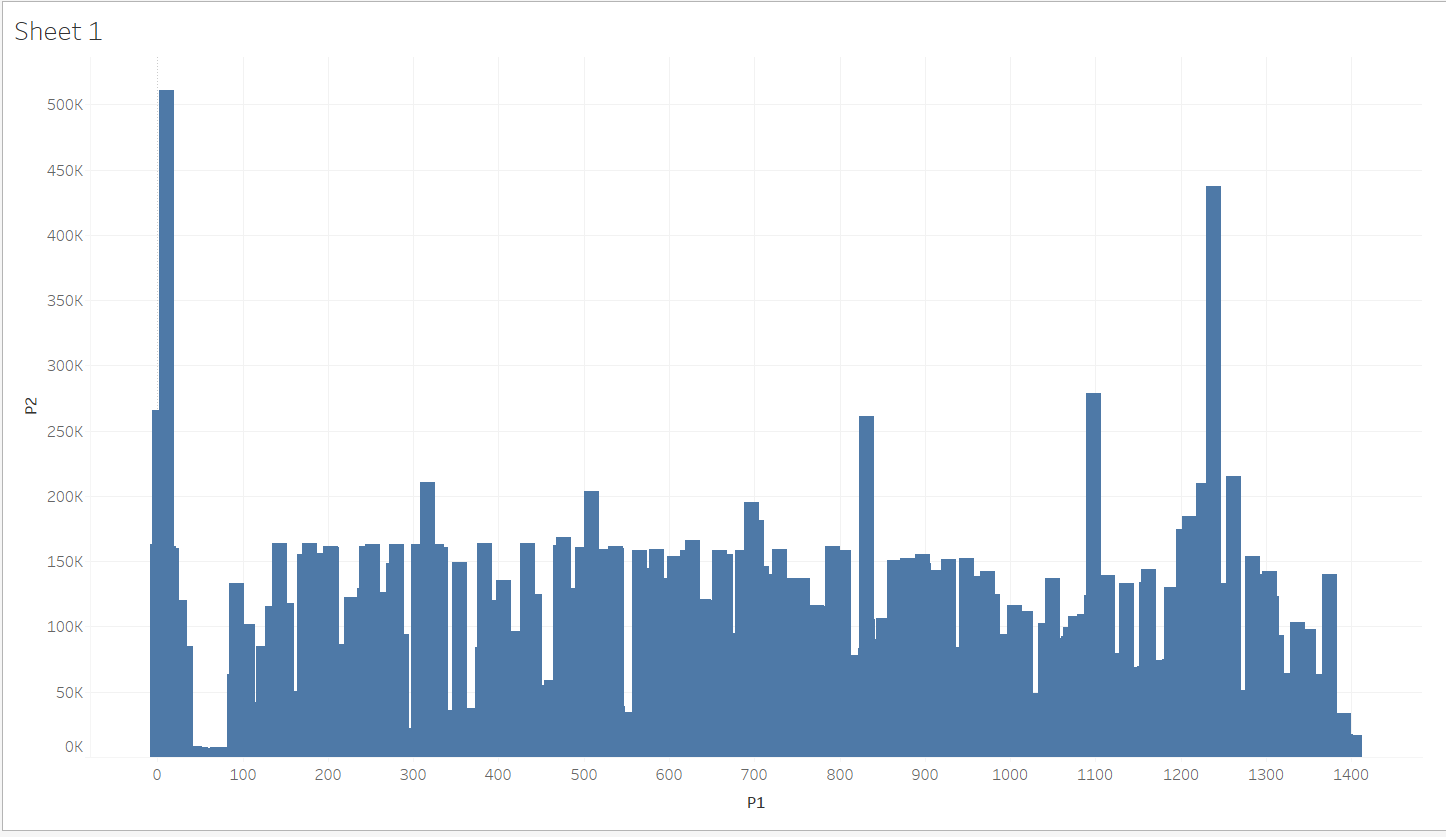

In [19]:
swipes.head()


,first_like_unlike_at,first_type,is_unmatch,like_count,p1,p2,second_like_unlike_at,second_type,unmatch_on
212,2023-02-08 05:13:13.430000+00:00,LIKE,True,2,0,35,2023-02-09 06:39:18.142000+00:00,LIKE,2023-02-11 11:31:48.390000+00:00
213,2023-02-08 05:13:24.752000+00:00,LIKE,False,1,0,36,NaT,NaN,NaT
214,2023-02-08 05:13:33.234000+00:00,LIKE,False,2,0,37,2023-02-09 06:40:14.134000+00:00,LIKE,NaT
215,2023-02-08 05:13:41.509000+00:00,DISLIKE,False,1,0,38,NaT,NaN,NaT
216,2023-02-08 05:13:46.215000+00:00,DISLIKE,False,1,0,39,NaT,NaN,NaT


swipes.csv - Dataset of ~60k swipes by profiles.

id - Primary ID of the swipe or match

p1 - Primary ID of the first person performing the swipe. If A swipes B then p1 is A

p2 - Primary ID of the person who was swiped by p1. If A swipes B then p2 is B

first_type - LIKE or DISLIKE performed by p1

is_unmatch - If the match was unmatched by any user.

unmatch_on - Timestamp of unmatch

like_count - 1 if single swipe is done. 2 if both have swiped each other

second_type - LIKE or DISLIKE performed by p2 (Only present if like_count is 2) and 2nd user performed the action.

p1_extend_at and p2_extend_at are irrelevant.

In [20]:
swipes[swipes['p1']==1]

,first_like_unlike_at,first_type,is_unmatch,like_count,p1,p2,second_like_unlike_at,second_type,unmatch_on
7376,2023-02-09 07:24:46.746000+00:00,LIKE,False,1,1,385,NaT,NaN,NaT
7377,2023-02-09 07:24:51.520000+00:00,LIKE,False,1,1,160,NaT,NaN,NaT
7379,2023-02-09 07:24:54.276000+00:00,LIKE,False,1,1,77,NaT,NaN,NaT
7384,2023-02-09 07:25:08.552000+00:00,LIKE,False,1,1,73,NaT,NaN,NaT
7385,2023-02-09 07:25:10.423000+00:00,LIKE,False,1,1,321,NaT,NaN,NaT
...,...,...,...,...,...,...,...,...,...
64510,2023-03-01 12:13:03.699000+00:00,DISLIKE,False,1,1,1337,NaT,NaN,NaT
64511,2023-03-01 12:13:06.092000+00:00,LIKE,False,1,1,523,NaT,NaN,NaT
64512,2023-03-01 12:13:08.077000+00:00,LIKE,False,1,1,924,NaT,NaN,NaT
64513,2023-03-01 12:13:14.760000+00:00,LIKE,False,1,1,1290,NaT,NaN,NaT


In [53]:
profiles1=[]
for i in range(1405):
  temp=swipes[swipes['p1']==i]
  # temp2={i:temp}
  profiles1.append(temp)

In [60]:
print(profiles1[])

                  first_like_unlike_at first_type  is_unmatch  like_count  p1  \
212   2023-02-08 05:13:13.430000+00:00       LIKE        True           2   0   
213   2023-02-08 05:13:24.752000+00:00       LIKE       False           1   0   
214   2023-02-08 05:13:33.234000+00:00       LIKE       False           2   0   
215   2023-02-08 05:13:41.509000+00:00    DISLIKE       False           1   0   
216   2023-02-08 05:13:46.215000+00:00    DISLIKE       False           1   0   
...                                ...        ...         ...         ...  ..   
62883 2023-02-27 20:40:44.524000+00:00       LIKE       False           1   0   
62884 2023-02-27 20:40:48.367000+00:00       LIKE       False           1   0   
62885 2023-02-27 20:40:55.653000+00:00    DISLIKE       False           1   0   
63877 2023-02-28 19:51:48.800000+00:00    DISLIKE       False           1   0   
63878 2023-02-28 19:52:01.085000+00:00    DISLIKE       False           1   0   

         p2            seco

In [55]:
profiles2=[]
for i in range(1405):
  temp=swipes[swipes['p2']==i]
  # temp2={i:temp}
  profiles2.append(temp)
print(profiles2[0])
print(len(profiles2))

                first_like_unlike_at first_type  is_unmatch  like_count   p1  \
0   2023-02-07 06:12:59.013000+00:00    DISLIKE       False           2    2   
3   2023-02-07 07:10:01.566000+00:00    DISLIKE       False           1    4   
11  2023-02-07 09:11:01.334000+00:00       LIKE       False           2   11   
32  2023-02-07 10:36:50.184000+00:00    DISLIKE       False           1   16   
41  2023-02-07 12:50:15.249000+00:00    DISLIKE       False           1   21   
62  2023-02-07 13:08:25.798000+00:00       LIKE       False           2   22   
67  2023-02-07 13:28:14.048000+00:00       LIKE       False           2   23   
102 2023-02-07 16:26:24.052000+00:00    DISLIKE       False           2   30   
423 2023-02-08 14:20:58.551000+00:00       LIKE       False           2  110   
444 2023-02-08 14:22:16.393000+00:00    DISLIKE       False           1  112   
449 2023-02-08 14:22:55.049000+00:00    DISLIKE       False           1  113   

     p2            second_like_unlike_a

In [68]:
users=pd.read_csv('./users.csv')
users['college'].value_counts()


["Jawaharlal Nehru University"]                    491
[]                                                 226
["JNU"]                                            118
["Jnu"]                                             76
["Miranda House"]                                   48
                                                  ... 
["IIT bhu"]                                          1
["Indian Institute of Technology BHU Varanasi"]      1
["Jawarlal Nehru University"]                        1
["Iit delhi"]                                        1
["Dps"]                                              1
Name: college, Length: 245, dtype: int64